# imports

In [1]:
import anndata as ad
import scanpy as sc
import numpy as np
import seaborn as sns
import palettable
import pandas as pd
import scipy.io as sio
import pickle
import sys
import scipy
import pyspark
sys.path.append('/home/yzy/bioSIMS/code/analysis')
from utils_220 import *
# sc.set_figure_params(dpi=500, color_map='viridis')
sc.set_figure_params(dpi=500, color_map='viridis',dpi_save=500,transparent=True)

sc.settings.verbosity = 2
heatmap_cmp = palettable.cmocean.diverging.Balance_20.mpl_colormap

# %matplotlib inline


Using TensorFlow backend.
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


# functions

In [2]:
def uniquify(mylist):
    return [v + '_'+str(mylist[:i].count(v) + 1) if mylist.count(v) > 0 else v for i, v in enumerate(mylist)]    

# data loading

In [3]:
data = 'P19_R1'
a_R1 = ad.read_h5ad('/home/yzy/ipynbs/figures/Supp/{0}/data.h5ad'.format(data))

In [4]:
a_R1.uns['final_cls_colors'] = [c for c in a_R1.uns['final_cls_colors']]

In [9]:
a_R1

AnnData object with n_obs × n_vars = 902 × 228 
    obs: 'cls_5', 'cls_5_pca', 'cls_5_pca_reorder', 'fibro_dist', 'fibro_dist_mum', 'cls_5_pca_reorder_IMlast', 'test', 'test_reorder', 'final_cls'
    uns: 'cls_5_colors', 'cls_5_pca_colors', 'cls_5_pca_reorder_IMlast_colors', 'cls_5_pca_reorder_colors', 'dendrogram_cls_5_pca', 'dendrogram_cls_5_pca_reorder', 'final_cls_colors', 'rank_genes_groups', 'rep_list', 'test_colors', 'test_reorder_colors'
    obsm: 'X_pca', 'X_umap', 'cls_5_pca_rep', 'cls_5_rep', 'spatial'

## ploting

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

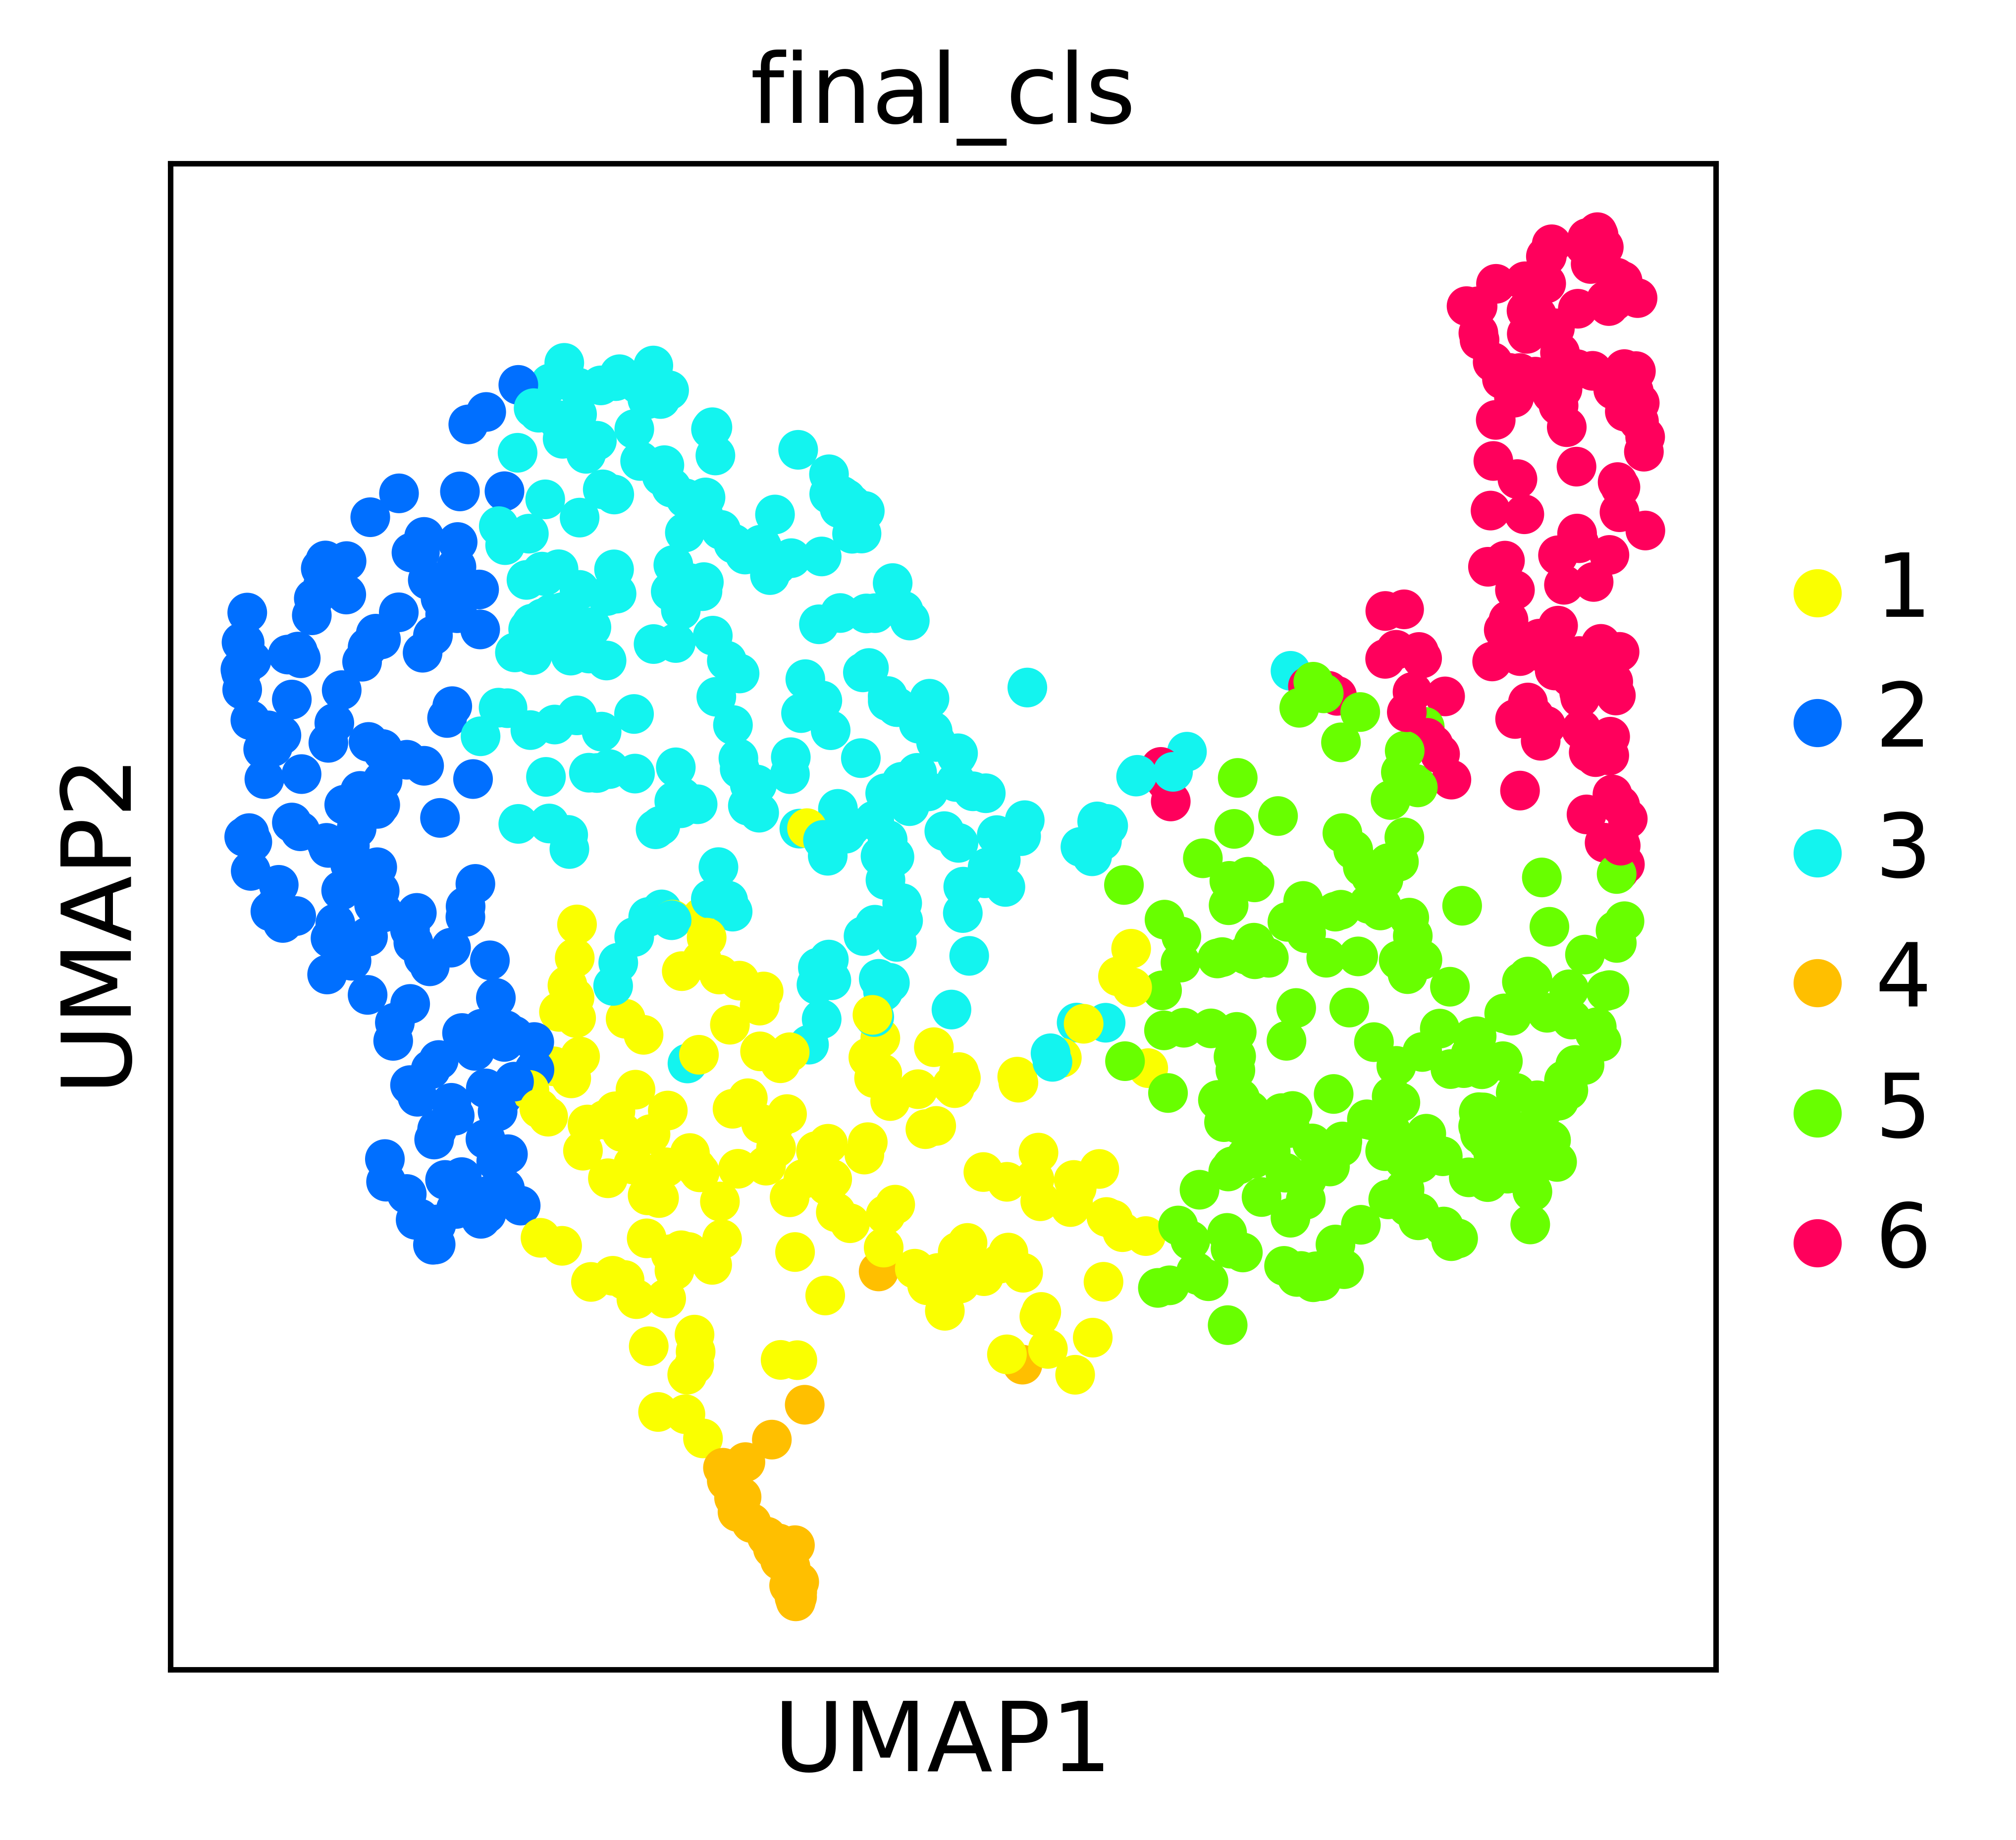

In [5]:
sc.pl.umap(a_R1,color='final_cls')

In [6]:
cls_list = ['KC','FB','IC','EC','H2','H1']
a_R1.obs['type'] = a_R1.obs['final_cls'].copy()
a_R1.uns['type_colors'] = a_R1.uns['final_cls_colors'].copy()
a_R1.rename_categories('type', cls_list)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

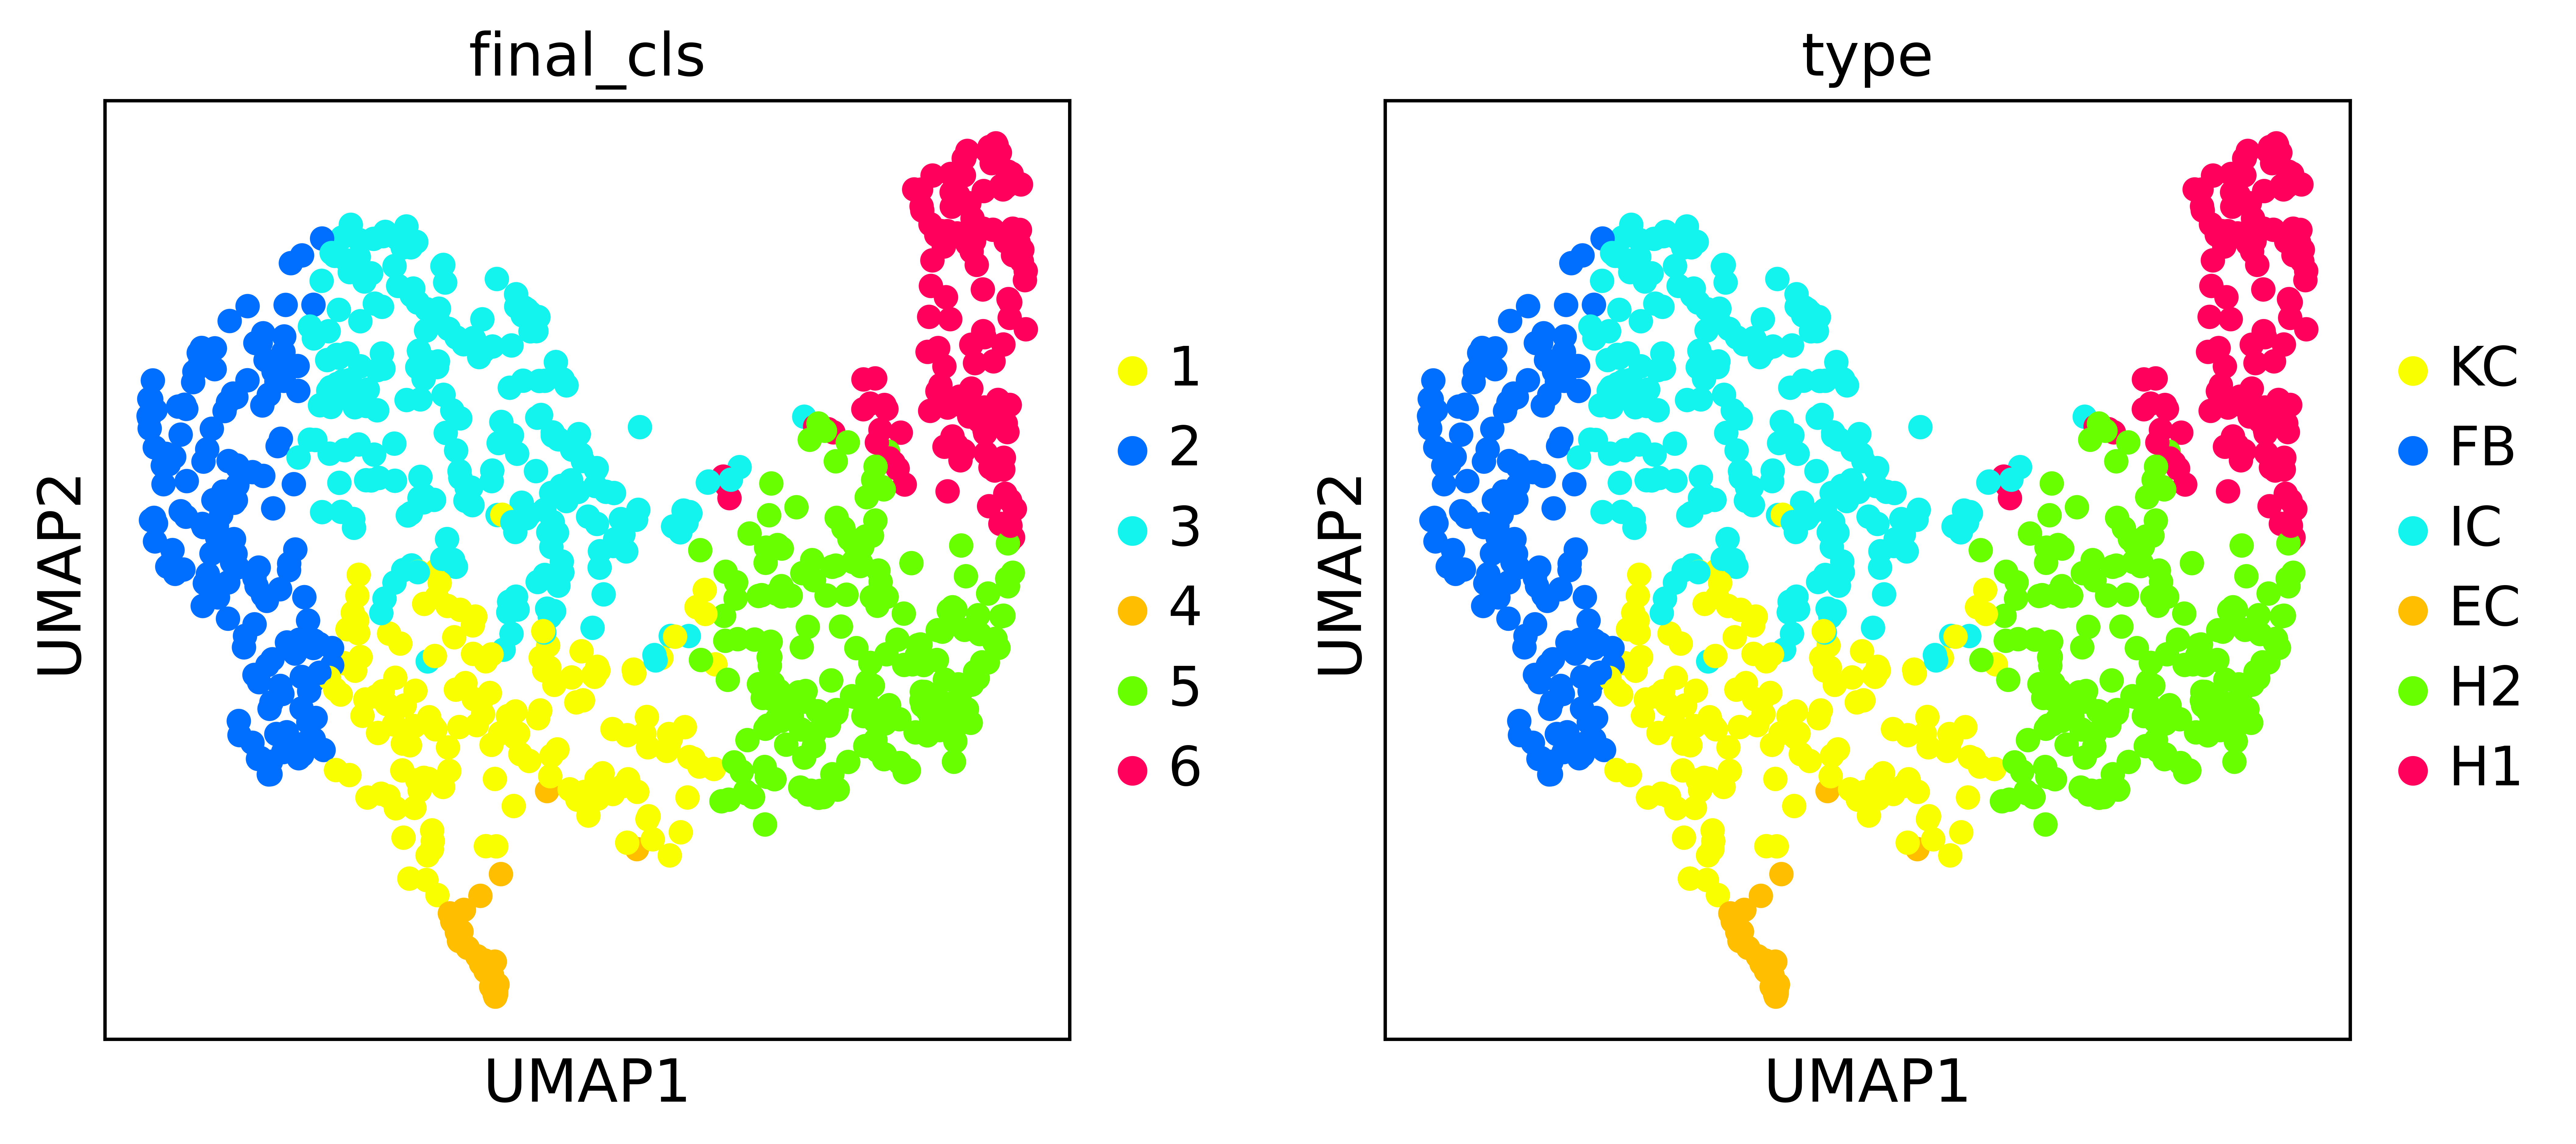

In [7]:
sc.pl.umap(a_R1,color=['final_cls','type'])

In [17]:
sc.settings.figdir = 'figures/Supp/{0}/'.format(data)
save_umap = '_dot.png'
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.set_style('white')

sc.pl.embedding(a_R1,basis='spatial',color='type',
              ax=ax,size=500,save=None)

# sc.pl.embedding(a,basis='spatial',color='final_cls',
#               ax=ax,groups=['5','6'],size=500,save=None)




NameError: name 'a_R1' is not defined

## trans preparing

In [9]:
trans_list = []
# radius是um为单位
radius_list = np.arange(20,50,10)
num_cells = a_R1.shape[0]
a_R1.obsm['spatial_distance_um'] = 400/256*squareform(pdist(a_R1.obsm['spatial']))
for i in range(num_cells):
    print(i)
    cur_a = a_R1[i]
    cur_celltype = cur_a.obs['type'][0]
    cur_spatial_distance_um = cur_a.obsm['spatial_distance_um'][0,:]
    prev_r = 0
    for r in radius_list:
#         这样就不包含了自己确实不能包含自己，因为要区分center／found
        cur_found_cells_idx = np.logical_and(cur_spatial_distance_um>prev_r,cur_spatial_distance_um<=r)
        cur_found_cells = list(a_R1[cur_found_cells_idx].obs['type'])
        cur_found_cells_uniquify = uniquify(cur_found_cells)
        cur_found_cells_uniquify.insert(0,cur_celltype+'_r'+str(r))
#         cur_found_cells_uniquify.insert(0,'radius_'+str(r))
        trans_list.append(cur_found_cells_uniquify)
    
with open('result/FP/trans_R1_20_50.pickle', 'wb') as handle:
    pickle.dump(trans_list, handle, protocol=pickle.HIGHEST_PROTOCOL)   
        
        
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
import pyfpgrowth

In [11]:
trans_list = [[1, 2, 5],
                [2, 4],
                [2, 3],
                [1, 2, 4],
                [1, 3],
                [2, 3],
                [1, 3],
                [1, 2, 3, 5],
                [1, 2, 3]]
trans_list_spark = [(i,trans_list[i]) for i in range(len(trans_list))]
# patterns = pyfpgrowth.find_frequent_patterns(transactions, 2)

In [2]:
with open('result/FP/trans_R1_20_50.pickle', 'rb') as handle:
    trans_list = pickle.load(handle)

In [3]:
trans_list_spark = [(i,trans_list[i]) for i in range(len(trans_list))]

In [8]:
import pyspark
from pyspark.ml.fpm import FPGrowth
# pyspark.createDataFrame

spark = pyspark.sql.SparkSession.builder \
    .master("local") \
    .appName("Word Count") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()



In [15]:
df = spark.createDataFrame([
    (0, [1, 2, 5]),
    (1, [1, 2, 3, 5]),
    (2, [1, 2])
], ["id", "items"])

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.5, minConfidence=0.6)
model = fpGrowth.fit(df)


Py4JJavaError: An error occurred while calling o206.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 1.0 failed 1 times, most recent failure: Lost task 0.0 in stage 1.0 (TID 1, localhost, executor driver): org.apache.spark.SparkException: 
Error from python worker:
  Traceback (most recent call last):
    File "/home/yzy/anaconda3/envs/jupyter/lib/python3.8/runpy.py", line 184, in _run_module_as_main
      mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
    File "/home/yzy/anaconda3/envs/jupyter/lib/python3.8/runpy.py", line 110, in _get_module_details
      __import__(pkg_name)
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 655, in _load_unlocked
    File "<frozen importlib._bootstrap>", line 618, in _load_backward_compatible
    File "<frozen zipimport>", line 259, in load_module
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/__init__.py", line 51, in <module>
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 655, in _load_unlocked
    File "<frozen importlib._bootstrap>", line 618, in _load_backward_compatible
    File "<frozen zipimport>", line 259, in load_module
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/context.py", line 31, in <module>
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 655, in _load_unlocked
    File "<frozen importlib._bootstrap>", line 618, in _load_backward_compatible
    File "<frozen zipimport>", line 259, in load_module
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/accumulators.py", line 97, in <module>
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 655, in _load_unlocked
    File "<frozen importlib._bootstrap>", line 618, in _load_backward_compatible
    File "<frozen zipimport>", line 259, in load_module
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 72, in <module>
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 655, in _load_unlocked
    File "<frozen importlib._bootstrap>", line 618, in _load_backward_compatible
    File "<frozen zipimport>", line 259, in load_module
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/cloudpickle.py", line 145, in <module>
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/cloudpickle.py", line 126, in _make_cell_set_template_code
  TypeError: an integer is required (got type bytes)
PYTHONPATH was:
  /home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip:/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/py4j-0.10.7-src.zip:/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/jars/spark-core_2.11-2.4.5.jar
org.apache.spark.SparkException: No port number in pyspark.daemon's stdout
	at org.apache.spark.api.python.PythonWorkerFactory.startDaemon(PythonWorkerFactory.scala:204)
	at org.apache.spark.api.python.PythonWorkerFactory.createThroughDaemon(PythonWorkerFactory.scala:122)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:95)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:117)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:109)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.sql.execution.SQLExecutionRDD$$anonfun$compute$1.apply(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.execution.SQLExecutionRDD$$anonfun$compute$1.apply(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.internal.SQLConf$.withExistingConf(SQLConf.scala:92)
	at org.apache.spark.sql.execution.SQLExecutionRDD.compute(SQLExecutionRDD.scala:51)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD$$anonfun$7.apply(RDD.scala:359)
	at org.apache.spark.rdd.RDD$$anonfun$7.apply(RDD.scala:357)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1165)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1091)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:882)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:357)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:308)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1891)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1879)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1878)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1878)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:927)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:927)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:927)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2112)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2061)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2050)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:738)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD.count(RDD.scala:1213)
	at org.apache.spark.ml.fpm.FPGrowth$$anonfun$genericFit$1.apply(FPGrowth.scala:181)
	at org.apache.spark.ml.fpm.FPGrowth$$anonfun$genericFit$1.apply(FPGrowth.scala:165)
	at org.apache.spark.ml.util.Instrumentation$$anonfun$11.apply(Instrumentation.scala:185)
	at scala.util.Try$.apply(Try.scala:192)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:185)
	at org.apache.spark.ml.fpm.FPGrowth.genericFit(FPGrowth.scala:165)
	at org.apache.spark.ml.fpm.FPGrowth.fit(FPGrowth.scala:162)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: 
Error from python worker:
  Traceback (most recent call last):
    File "/home/yzy/anaconda3/envs/jupyter/lib/python3.8/runpy.py", line 184, in _run_module_as_main
      mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
    File "/home/yzy/anaconda3/envs/jupyter/lib/python3.8/runpy.py", line 110, in _get_module_details
      __import__(pkg_name)
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 655, in _load_unlocked
    File "<frozen importlib._bootstrap>", line 618, in _load_backward_compatible
    File "<frozen zipimport>", line 259, in load_module
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/__init__.py", line 51, in <module>
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 655, in _load_unlocked
    File "<frozen importlib._bootstrap>", line 618, in _load_backward_compatible
    File "<frozen zipimport>", line 259, in load_module
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/context.py", line 31, in <module>
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 655, in _load_unlocked
    File "<frozen importlib._bootstrap>", line 618, in _load_backward_compatible
    File "<frozen zipimport>", line 259, in load_module
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/accumulators.py", line 97, in <module>
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 655, in _load_unlocked
    File "<frozen importlib._bootstrap>", line 618, in _load_backward_compatible
    File "<frozen zipimport>", line 259, in load_module
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 72, in <module>
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 655, in _load_unlocked
    File "<frozen importlib._bootstrap>", line 618, in _load_backward_compatible
    File "<frozen zipimport>", line 259, in load_module
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/cloudpickle.py", line 145, in <module>
    File "/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/cloudpickle.py", line 126, in _make_cell_set_template_code
  TypeError: an integer is required (got type bytes)
PYTHONPATH was:
  /home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip:/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/python/lib/py4j-0.10.7-src.zip:/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/pyspark/jars/spark-core_2.11-2.4.5.jar
org.apache.spark.SparkException: No port number in pyspark.daemon's stdout
	at org.apache.spark.api.python.PythonWorkerFactory.startDaemon(PythonWorkerFactory.scala:204)
	at org.apache.spark.api.python.PythonWorkerFactory.createThroughDaemon(PythonWorkerFactory.scala:122)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:95)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:117)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:109)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.sql.execution.SQLExecutionRDD$$anonfun$compute$1.apply(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.execution.SQLExecutionRDD$$anonfun$compute$1.apply(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.internal.SQLConf$.withExistingConf(SQLConf.scala:92)
	at org.apache.spark.sql.execution.SQLExecutionRDD.compute(SQLExecutionRDD.scala:51)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD$$anonfun$7.apply(RDD.scala:359)
	at org.apache.spark.rdd.RDD$$anonfun$7.apply(RDD.scala:357)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1165)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1091)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1156)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:882)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:357)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:308)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [12]:
df = spark.createDataFrame([
    trans_list_spark
], ["id", "items"])

In [14]:
fpGrowth = FPGrowth(itemsCol="items", minSupport=0.5, minConfidence=0.6)
model = fpGrowth.fit(df)

IllegalArgumentException: 'requirement failed: The input column must be array, but got struct<_1:bigint,_2:array<bigint>>.'

In [27]:
patterns = pyfpgrowth.find_frequent_patterns(trans_list[:5], 1)

In [29]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

KeyboardInterrupt: 

In [ ]:
1+1

In [28]:
patterns

{('KC_r20',): 1,
 ('FB_2', 'KC_r20'): 1,
 ('IC_3', 'KC_r20'): 1,
 ('FB_1', 'KC_r20'): 1,
 ('IC_2', 'KC_r20'): 1,
 ('IC_1', 'KC_r20'): 1,
 ('FB_2', 'IC_3', 'KC_r20'): 1,
 ('FB_1', 'FB_2', 'KC_r20'): 1,
 ('FB_2', 'IC_2', 'KC_r20'): 1,
 ('FB_2', 'IC_1', 'KC_r20'): 1,
 ('FB_1', 'IC_3', 'KC_r20'): 1,
 ('IC_2', 'IC_3', 'KC_r20'): 1,
 ('IC_1', 'IC_3', 'KC_r20'): 1,
 ('FB_1', 'IC_2', 'KC_r20'): 1,
 ('FB_1', 'IC_1', 'KC_r20'): 1,
 ('IC_1', 'IC_2', 'KC_r20'): 1,
 ('FB_1', 'FB_2', 'IC_3', 'KC_r20'): 1,
 ('FB_2', 'IC_2', 'IC_3', 'KC_r20'): 1,
 ('FB_2', 'IC_1', 'IC_3', 'KC_r20'): 1,
 ('FB_1', 'FB_2', 'IC_2', 'KC_r20'): 1,
 ('FB_1', 'FB_2', 'IC_1', 'KC_r20'): 1,
 ('FB_2', 'IC_1', 'IC_2', 'KC_r20'): 1,
 ('FB_1', 'IC_2', 'IC_3', 'KC_r20'): 1,
 ('FB_1', 'IC_1', 'IC_3', 'KC_r20'): 1,
 ('IC_1', 'IC_2', 'IC_3', 'KC_r20'): 1,
 ('FB_1', 'IC_1', 'IC_2', 'KC_r20'): 1,
 ('FB_1', 'FB_2', 'IC_2', 'IC_3', 'KC_r20'): 1,
 ('FB_1', 'FB_2', 'IC_1', 'IC_3', 'KC_r20'): 1,
 ('FB_2', 'IC_1', 'IC_2', 'IC_3', 'KC_r20'): 1,

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [70]:
trans_list[15]

['radius_90',
 'IC_center',
 'KC_1',
 'IC_1',
 'IC_2',
 'FB_1',
 'H2_1',
 'IC_3',
 'IC_4',
 'FB_2',
 'FB_3',
 'IC_5',
 'FB_4',
 'IC_6',
 'KC_2',
 'FB_5',
 'FB_6',
 'FB_7',
 'FB_8',
 'IC_7',
 'KC_3',
 'FB_9',
 'IC_8',
 'FB_10',
 'FB_11',
 'KC_4',
 'FB_12',
 'FB_13',
 'KC_5',
 'IC_9',
 'FB_14',
 'FB_15',
 'FB_16',
 'FB_17',
 'IC_10',
 'IC_11',
 'IC_12',
 'FB_18',
 'KC_6',
 'FB_19',
 'FB_20',
 'IC_13',
 'KC_7',
 'FB_21',
 'IC_14',
 'IC_15',
 'IC_16',
 'KC_8',
 'FB_22',
 'IC_17',
 'IC_18',
 'FB_23',
 'IC_19',
 'H2_2',
 'IC_20',
 'FB_24',
 'KC_9',
 'IC_21',
 'IC_22',
 'KC_10',
 'IC_23',
 'FB_25',
 'FB_26',
 'KC_11',
 'KC_12',
 'KC_13',
 'FB_27',
 'IC_24',
 'FB_28',
 'IC_25',
 'IC_26',
 'FB_29',
 'FB_30',
 'FB_31',
 'FB_32',
 'H2_3',
 'IC_27',
 'FB_33',
 'FB_34',
 'FB_35',
 'IC_28',
 'KC_14',
 'FB_36',
 'FB_37',
 'FB_38',
 'FB_39',
 'FB_40',
 'FB_41',
 'FB_42',
 'IC_29',
 'FB_43',
 'IC_30']

In [38]:
mylist = ["name", "state", "name", "city", "name", "zip", "zip",'name']


uniquify(mylist)

['name1', 'state', 'name2', 'city', 'name3', 'zip1', 'zip2', 'name4']

In [35]:


[v + str(mylist[:i].count(v) + 1) if mylist.count(v) > 1 else v for i, v in enumerate(mylist)]

['name1', 'state', 'name2', 'city', 'name3', 'zip1', 'zip2']